# Moving Correlation Coefficient

https://www.fmlabs.com/reference/default.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = '^nsei'
symbol2 = '^nsebank'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

# View Columns
df1.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [4]:
cc = df1['Adj Close'].corr(df2['Adj Close'])

In [5]:
cc

0.960178223656317

In [6]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [7]:
df.head()

,Adj Close,Adj Close
Date,,
2020-01-01 00:00:00+05:30,12182.500000,NaN
2020-01-02 00:00:00+05:30,12282.200195,32443.472656
2020-01-03 00:00:00+05:30,12226.650391,32068.876953
2020-01-06 00:00:00+05:30,11993.049805,31236.787109
2020-01-07 00:00:00+05:30,12052.950195,31399.035156


In [8]:
# Rename columns
df.columns = [symbol1,symbol2]

In [9]:
df.head()

,^nsei,^nsebank
Date,,
2020-01-01 00:00:00+05:30,12182.500000,NaN
2020-01-02 00:00:00+05:30,12282.200195,32443.472656
2020-01-03 00:00:00+05:30,12226.650391,32068.876953
2020-01-06 00:00:00+05:30,11993.049805,31236.787109
2020-01-07 00:00:00+05:30,12052.950195,31399.035156


In [11]:
n = 14
df['M_Cor'] = df['^nsei'].rolling(n).corr(df['^nsebank']).rolling(n).mean()

In [12]:
df.head(30)

,^nsei,^nsebank,M_Cor
Date,,,
2020-01-01 00:00:00+05:30,12182.500000,NaN,NaN
2020-01-02 00:00:00+05:30,12282.200195,32443.472656,NaN
2020-01-03 00:00:00+05:30,12226.650391,32068.876953,NaN
2020-01-06 00:00:00+05:30,11993.049805,31236.787109,NaN
2020-01-07 00:00:00+05:30,12052.950195,31399.035156,NaN
2020-01-08 00:00:00+05:30,12025.349609,31373.285156,NaN
2020-01-09 00:00:00+05:30,12215.900391,32092.027344,NaN
2020-01-10 00:00:00+05:30,12256.799805,32097.027344,NaN
2020-01-13 00:00:00+05:30,12329.549805,32177.277344,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

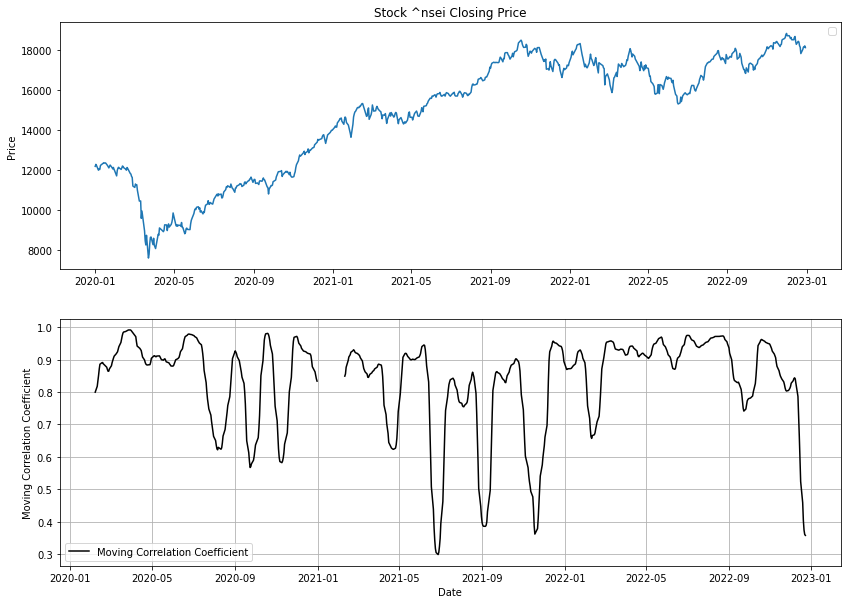

In [13]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['M_Cor'], label='Moving Correlation Coefficient', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Moving Correlation Coefficient')
ax2.set_xlabel('Date')

## Candlestick with Moving Correlation Coefficient

In [14]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,False
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,True
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,False
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,False
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,False


Text(0.5, 0, 'Date')

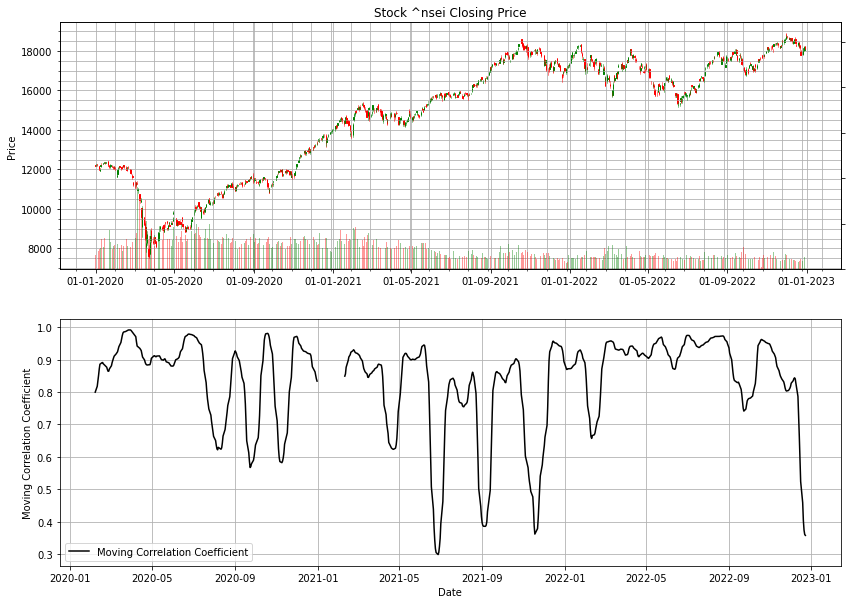

In [16]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['M_Cor'], label='Moving Correlation Coefficient', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Moving Correlation Coefficient')
ax2.set_xlabel('Date')